In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

In [10]:
# Percorso della cartella dei DataFrame
path_dataframes = os.path.join("dataset", "dataframes")

,TIME,P1,P2,P3,P4,P5,P6,P7,Case
0,0.000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.001,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,0.002,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,0.003,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,0.004,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1



📌 Informazioni generali sul dataset di training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212577 entries, 0 to 212576
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TIME    212577 non-null  float64
 1   P1      212577 non-null  float64
 2   P2      212577 non-null  float64
 3   P3      212577 non-null  float64
 4   P4      212577 non-null  float64
 5   P5      212577 non-null  float64
 6   P6      212577 non-null  float64
 7   P7      212577 non-null  float64
 8   Case    212577 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 14.6 MB

🔍 Valori nulli nel dataset:


TIME    0
P1      0
P2      0
P3      0
P4      0
P5      0
P6      0
P7      0
Case    0
dtype: int64


📊 Statistiche descrittive del dataset di training:


,TIME,P1,P2,P3,P4,P5,P6,P7,Case
count,212577.0000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000
mean,0.6000,1.985313,1.978832,1.973185,1.976326,1.979386,1.967744,1.971499,89.000000
std,0.3467,0.295166,0.444962,0.531813,0.573256,0.457598,0.589124,0.584963,51.094804
min,0.0000,0.349958,0.000525,-0.036125,-0.022876,-0.003158,-0.043870,-0.025077,1.000000
25%,0.3000,1.894327,1.843861,1.830259,1.809942,1.840962,1.806549,1.799151,45.000000
50%,0.6000,1.958179,1.930710,1.930259,1.923895,1.927255,1.917058,1.917724,89.000000
75%,0.9000,2.061673,2.102222,2.113830,2.129266,2.107731,2.138921,2.141128,133.000000
max,1.2000,4.485485,5.634843,6.604209,6.079427,5.213492,5.868886,5.676262,177.000000



📈 Distribuzione delle prime colonne:


array([[<Axes: title={'center': 'TIME'}>, <Axes: title={'center': 'P1'}>],
       [<Axes: title={'center': 'P2'}>, <Axes: title={'center': 'P3'}>],
       [<Axes: title={'center': 'P4'}>, <Axes: >]], dtype=object)

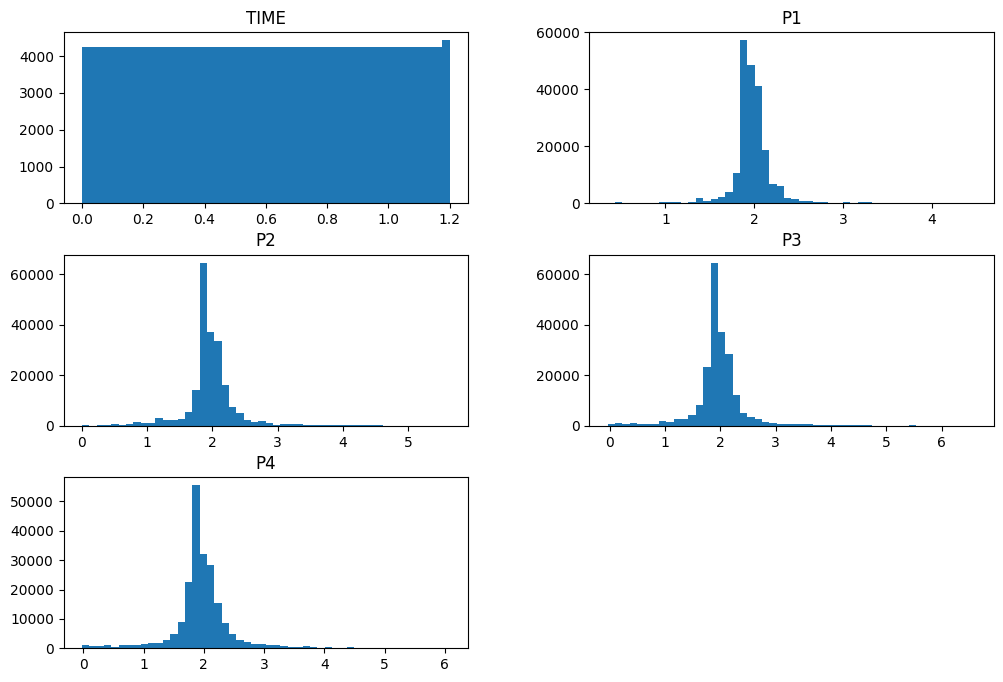

In [11]:
# Caricamento del dataset dal file Pickle
df_train = pd.read_pickle(os.path.join(path_dataframes, "train_data.pkl"))

# Mostriamo le prime righe per confermare il caricamento
display(df_train.head())

# Informazioni generali sul dataset
print("\n📌 Informazioni generali sul dataset di training:")
df_train.info()

# Controllo della presenza di valori nulli
print("\n🔍 Valori nulli nel dataset:")
display(df_train.isnull().sum())

# Statistiche descrittive del dataset
print("\n📊 Statistiche descrittive del dataset di training:")
display(df_train.describe())

# Distribuzione delle prime colonne numeriche
print("\n📈 Distribuzione delle prime colonne:")
df_train.iloc[:, :5].hist(figsize=(12, 8), bins=50, grid=False)


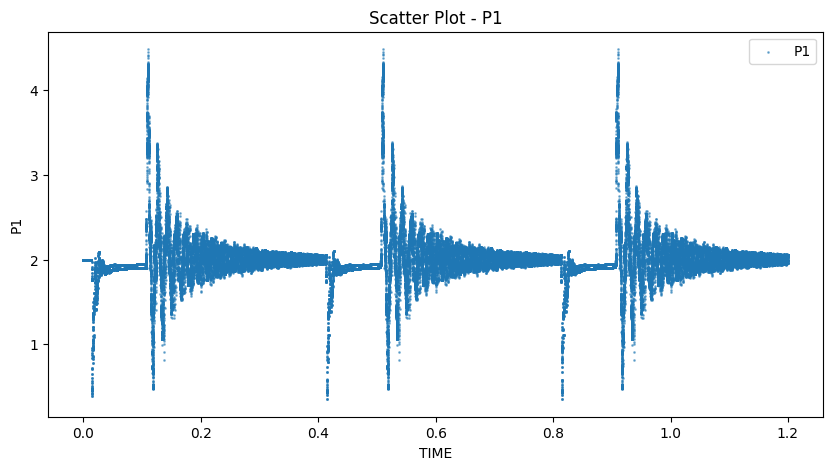

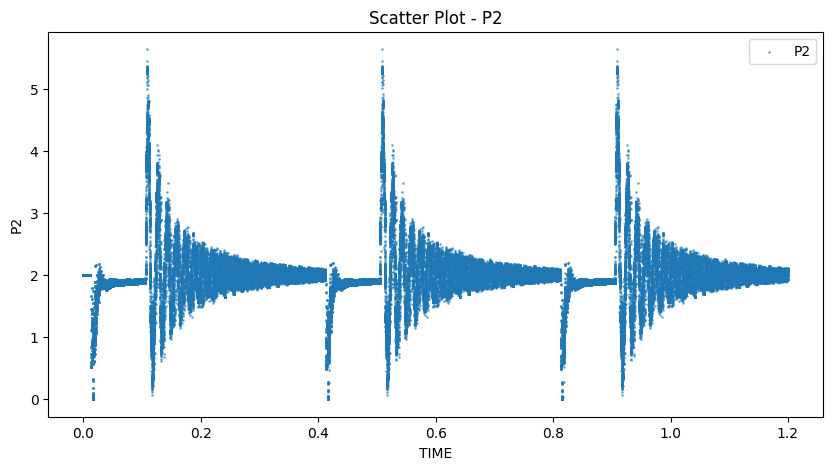

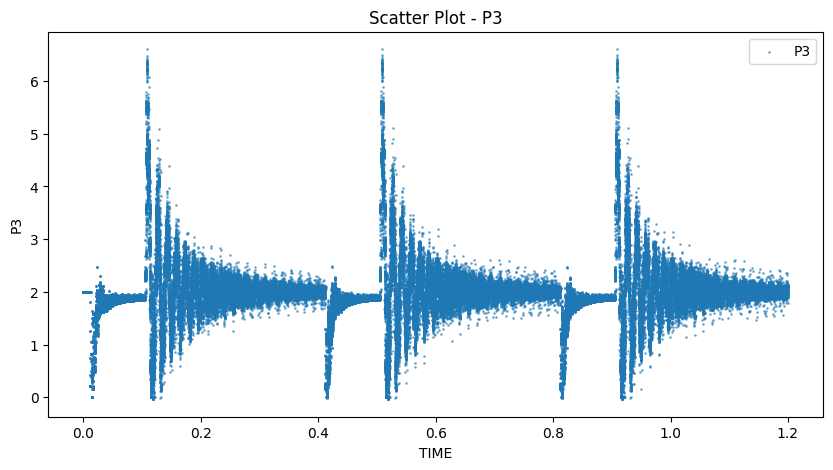

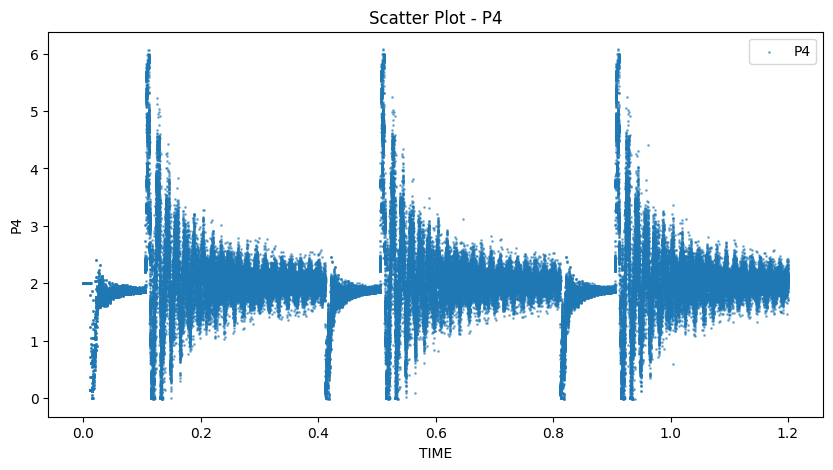

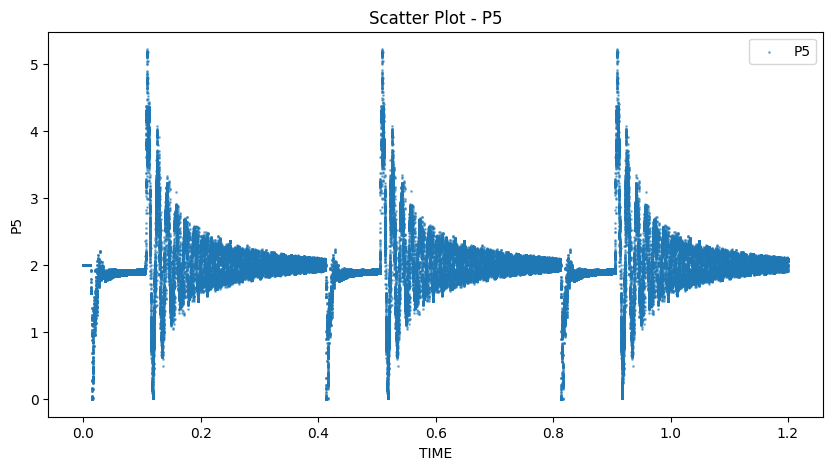

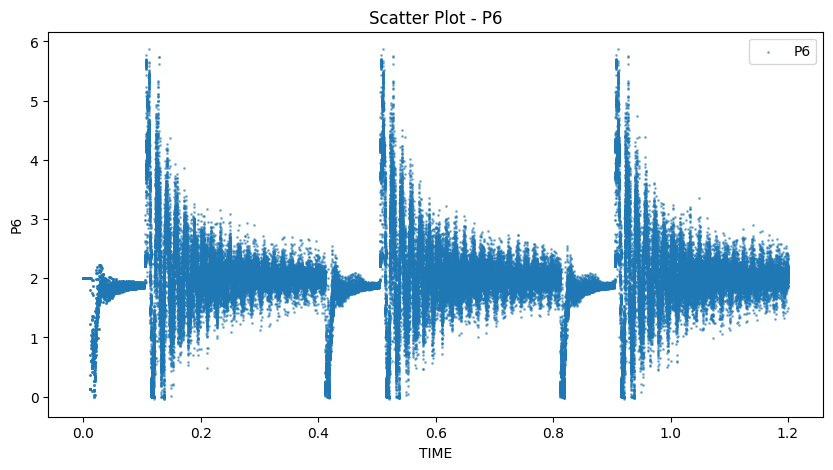

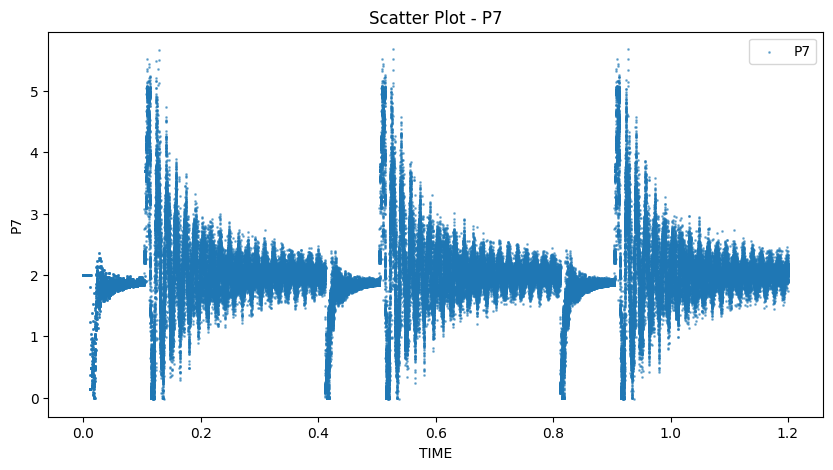

In [12]:
# Selezioniamo i sensori ignorando TIME e Case
sensori = [col for col in df_train.columns if col not in ["TIME", "Case"]]

# Creazione degli scatter plot per ogni sensore
for sensore in sensori:
    plt.figure(figsize=(10, 5))
    plt.scatter(df_train["TIME"], df_train[sensore], alpha=0.5, s=1, label=sensore)
    plt.xlabel("TIME")
    plt.ylabel(sensore)
    plt.title(f"Scatter Plot - {sensore}")
    plt.legend()
    plt.show()

# Visualizzazione per Sensore e Caso

In [13]:
# Selezione di un sensore specifico (scegliamo il primo sensore disponibile)
sensore_selezionato = df_train.columns[1]  # Ignoriamo TIME e Case

# Selezione di un solo caso tra i 178 disponibili
caso_selezionato = 1  # Cambia questo valore per selezionare un altro caso
df_caso = df_train[df_train["Case"] == caso_selezionato]

# Creazione del grafico a linee con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_caso["TIME"],
    y=df_caso[sensore_selezionato],
    mode='lines',
    name=sensore_selezionato
))

fig.update_layout(
    title=f"Serie Temporale - Sensore {sensore_selezionato} - Caso {caso_selezionato}",
    xaxis_title="TIME",
    yaxis_title=sensore_selezionato,
    template="plotly_white"
)

# Mostra il grafico
fig.show()